# Simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import Normalizer
%matplotlib inline

In [2]:
from egnmf.gnmf import GNMF
from egnmf.egnmf import EGNMF
from egnmf.metrics import calc_ac_score, calc_nmi_score

Input 
----

In [3]:
digits = load_digits()
X_digits = digits['data']
y_digits = digits['target']
cls_digits = len(np.unique(y_digits))

Normalization
----

In [4]:
scaler = Normalizer()
X_digits = scaler.fit_transform(X_digits)

Fitting
----

In [5]:
kmeans = KMeans(n_clusters=cls_digits, random_state=0)
sc = SpectralClustering(n_clusters=cls_digits, random_state=0)
pca = PCA(n_components=cls_digits, random_state=0)
nmf = NMF(n_components=cls_digits, random_state=0, max_iter=500, init='nndsvda')
gnmf = GNMF(n_components=cls_digits, random_state=0)
egnmf = EGNMF(n_clusters=cls_digits, random_state=0)

In [6]:
labels = {}

# KMeans
labels['KMeans'] = kmeans.fit(X_digits).labels_

# Spectral Clustering
labels['SC'] = sc.fit(X_digits).labels_

# PCA + KMeans
X_pca = pca.fit_transform(X_digits)
labels['PCA'] = kmeans.fit(X_pca).labels_

# NMF + KMeans
X_nmf = nmf.fit_transform(X_digits)
labels['NMF'] = kmeans.fit(X_nmf).labels_

# GNMF + KMeans
X_gnmf = gnmf.fit(X_digits).get_coef()
labels['GNMF'] = kmeans.fit(X_gnmf).labels_

# EGNMF
labels['EGNMF'] = egnmf.fit(X_digits).labels_

Evaluation
----

In [7]:
algorithms = ['KMeans', 'SC', 'PCA', 'NMF', 'GNMF', 'EGNMF']
acs = []
nmis = []

for algorithm in algorithms:
    acs.append(calc_ac_score(y_digits, labels[algorithm]) * 100)
    nmis.append(calc_nmi_score(y_digits, labels[algorithm]) * 100)

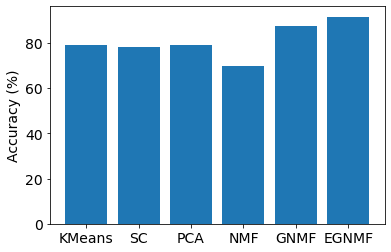

In [8]:
plt.bar(algorithms, acs)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.tick_params(labelsize=14)
plt.show()

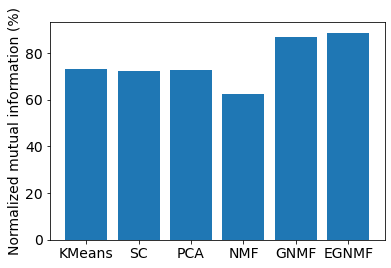

In [9]:
plt.bar(algorithms, nmis)
plt.ylabel("Normalized mutual information (%)", fontsize=14)
plt.tick_params(labelsize=14)
plt.show()